<a href="https://colab.research.google.com/github/chandrakiranck/fuzzy-adventure/blob/master/stock_kmeans_and_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [0]:
data=pd.read_csv("/content/drive/My Drive/Unsupervised class/stock.csv")
X = data.iloc[0:,1:]
companies = pd.read_csv("/content/drive/My Drive/Unsupervised class/stock.csv").iloc[0:,0]

In [0]:
data.shape

(60, 964)

In [0]:
data.head(60)

,company,04-01-2010,05-01-2010,06-01-2010,07-01-2010,08-01-2010,11-01-2010,12-01-2010,13-01-2010,14-01-2010,15-01-2010,19-01-2010,20-01-2010,21-01-2010,22-01-2010,25-01-2010,26-01-2010,27-01-2010,28-01-2010,29-01-2010,01-02-2010,02-02-2010,03-02-2010,04-02-2010,05-02-2010,08-02-2010,09-02-2010,10-02-2010,11-02-2010,12-02-2010,16-02-2010,17-02-2010,18-02-2010,19-02-2010,22-02-2010,23-02-2010,24-02-2010,25-02-2010,26-02-2010,01-03-2010,...,04-09-2013,05-09-2013,06-09-2013,09-09-2013,10-09-2013,11-09-2013,12-09-2013,13-09-2013,16-09-2013,17-09-2013,18-09-2013,19-09-2013,20-09-2013,23-09-2013,24-09-2013,25-09-2013,26-09-2013,27-09-2013,30-09-2013,01-10-2013,02-10-2013,03-10-2013,04-10-2013,07-10-2013,08-10-2013,09-10-2013,10-10-2013,11-10-2013,14-10-2013,15-10-2013,16-10-2013,17-10-2013,18-10-2013,21-10-2013,22-10-2013,23-10-2013,24-10-2013,25-10-2013,28-10-2013,29-10-2013
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,6.709993,-3.180006,-4.009998,-9.030006,0.560000,-0.010000,1.030010,-5.640009,-9.019993,2.360001,-0.050001,4.060000,-4.680000,2.829998,-1.570009,-0.229992,-0.769990,3.789993,2.269998,1.459994,-1.639998,1.300003,-0.190005,-1.920004,-2.940000,2.430002,4.619999,2.239998,3.240008,...,-0.869980,-4.980034,-0.219979,1.169960,-11.559998,0.699989,4.190003,-4.439995,-10.879982,7.360008,1.500008,1.599983,-10.589988,-5.459991,-5.779999,-7.669976,0.219979,-1.029983,-0.500038,9.510018,3.929970,-7.100029,-0.829979,1.190040,-9.000045,1.950005,-1.679985,5.820000,6.209969,1.169960,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,0.200001,-0.100000,-0.460001,-1.190001,-0.650000,-1.300001,0.430000,-1.690000,-0.300001,-0.420000,-0.020001,-0.099998,-0.940001,-0.090000,-0.250000,0.760000,3.710001,-0.200001,1.000000,0.000000,-0.630001,0.299999,-0.010000,1.540001,-1.459999,0.830000,0.069999,-0.900000,-2.179998,...,0.680000,0.229999,-0.720002,0.829998,-0.130001,0.340000,-0.620003,0.320000,-0.470001,0.790001,0.279999,-0.930000,-0.020000,-0.439998,0.100003,0.190003,-0.239998,-0.029998,0.020000,0.579998,0.350002,-0.210003,0.660000,-0.310001,-1.099998,0.050000,1.290001,0.330002,0.599999,-0.160000,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,1.300003,-1.349998,-0.639999,-4.169998,-1.790000,-1.079995,1.720001,1.599999,-4.360000,-4.309997,-0.669998,1.979995,-2.699997,1.510002,-2.549995,-0.169998,-0.639999,2.879997,0.670006,-2.529999,-0.760002,2.240006,-0.390007,0.639999,-0.770004,1.760002,0.029999,0.520005,5.840004,...,5.310028,0.470001,0.529998,2.489990,-0.190003,0.730011,-0.530030,-2.220002,-3.760009,6.540008,7.970001,-1.709991,3.799987,-2.520020,1.700012,-1.880005,4.220001,-0.910003,-0.769989,6.730011,2.470001,-5.630005,3.910004,-5.209991,-8.269989,-5.190002,0.540008,6.120026,1.480011,-3.470001,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,0.719997,0.050000,-0.830002,-2.770001,-1.309997,0.559997,0.709999,-1.239998,0.060002,0.369999,0.340000,-0.579998,-0.500000,0.189998,-0.969997,0.270001,0.169998,0.480000,0.629997,0.809998,-0.480000,0.080002,0.170002,-0.169998,-0.810002,0.310002,0.370003,0.039997,-0.070000,...,0.620002,0.639999,-0.570000,0.070008,0.379997,0.480003,0.000000,-0.279999,-0.739998,1.320000,0.650001,-0.239998,-0.300003,-0.849999,-0.319999,-0.139999,0.320000,-0.169999,0.549996,0.290001,-0.549995,-0.090004,0.430001,-0.559998,-0.809998,-0.159996,1.470002,0.730004,0.739998,-0.379997,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.

In [0]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)  # fit does nothing.
print(transformer)
Normalizer(copy=True, norm='l2')
df_scaled=transformer.transform(X)

Normalizer(copy=True, norm='l2')


In [0]:
X=pd.DataFrame(df_scaled)

In [0]:
from sklearn.decomposition import PCA

Centering the Data

In [0]:
X_centered = X - X.mean(axis=0)

PCA with 2 components

In [0]:
pca = PCA(n_components=2)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Get new dimensions

In [0]:
X_pca = pca.transform(X_centered)

In [0]:
X_pca.shape

(60, 2)

In [0]:
from sklearn.cluster import KMeans


# Let us check optimal number of clusters-


cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X_pca)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]


,num_clusters,cluster_errors
0,1,4.720256
1,2,2.587365
2,3,1.205340
3,4,0.796684
4,5,0.569673
5,6,0.465239
6,7,0.364265
7,8,0.312251
8,9,0.257095


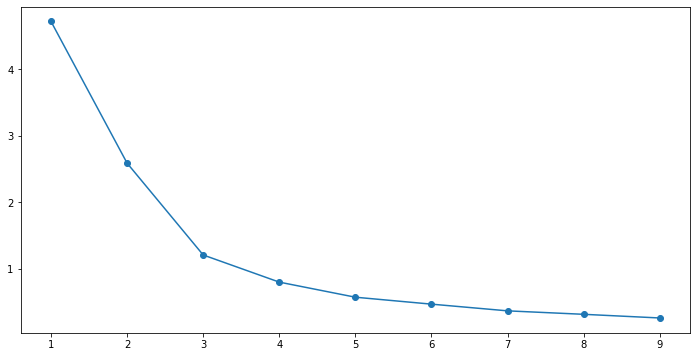

In [0]:

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [0]:
# Number of clusters

kmeans = KMeans(n_clusters=6)

# Fitting the input data

kmeans = kmeans.fit(X_pca)

# Getting the cluster labels

labels = kmeans.predict(X_pca)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 0.43839673 -0.0012722 ]
 [-0.15551314 -0.10069274]
 [-0.09209539  0.25932032]
 [ 0.03944514 -0.26894985]
 [-0.19385041  0.1214772 ]
 [ 0.08555889  0.13253056]]


In [0]:
kmeans.inertia_

0.4607085585175553

In [0]:
X_pca=pd.DataFrame(X_pca)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.48630421790871997


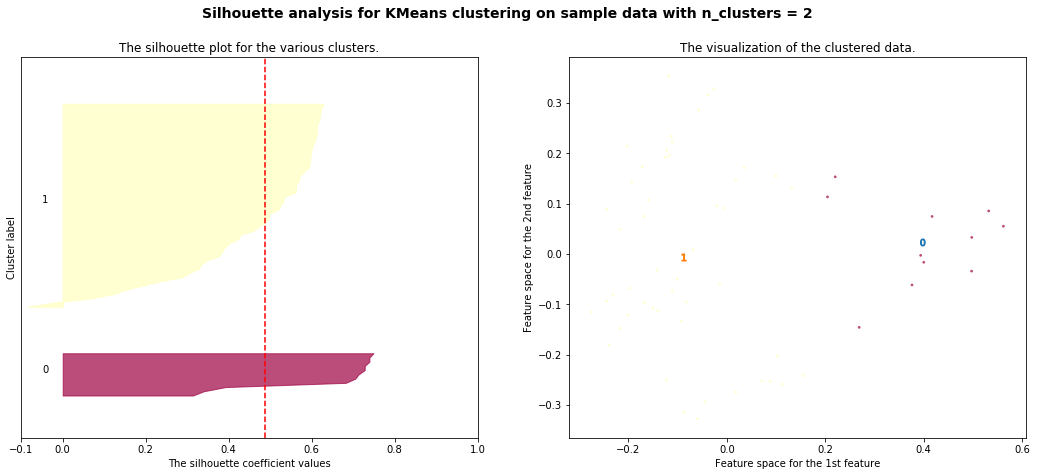

For n_clusters = 3 The average silhouette_score is : 0.4964754011029144


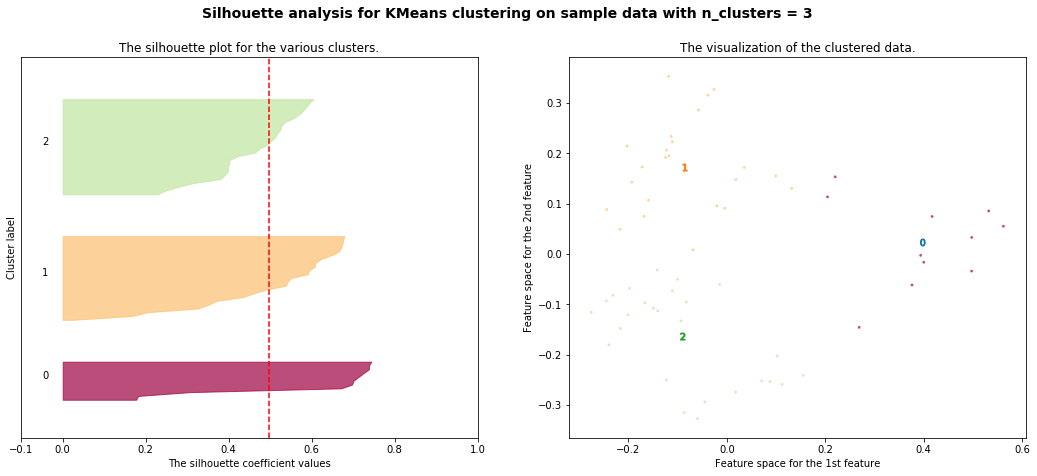

For n_clusters = 4 The average silhouette_score is : 0.4969809619515719


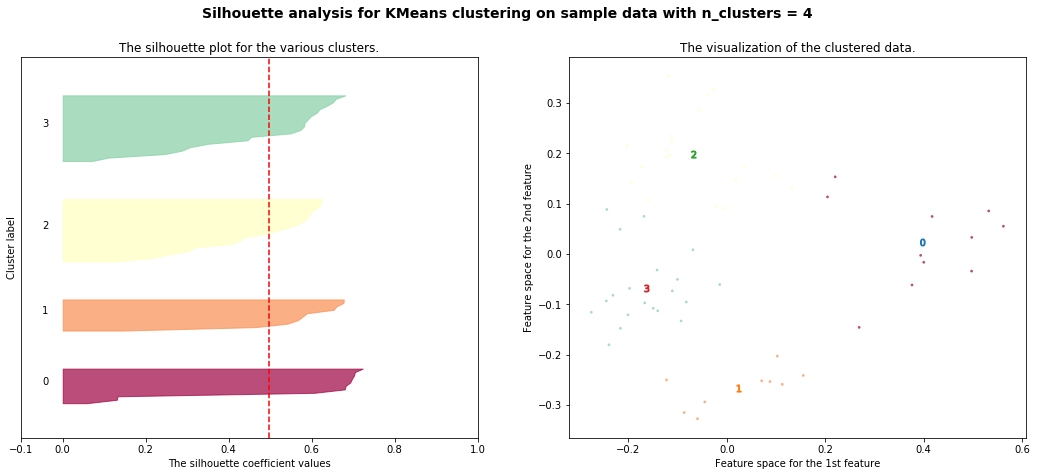

For n_clusters = 5 The average silhouette_score is : 0.5094675898792905


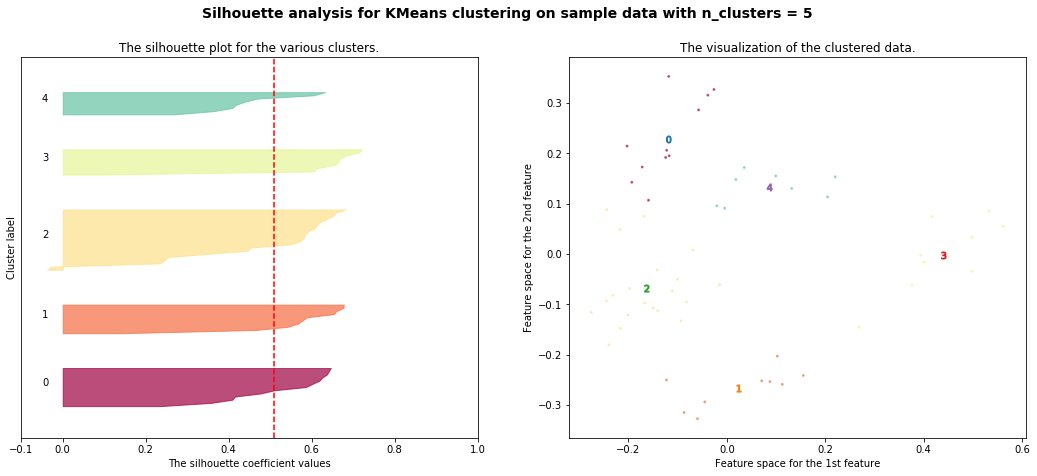

For n_clusters = 6 The average silhouette_score is : 0.48089197578704834


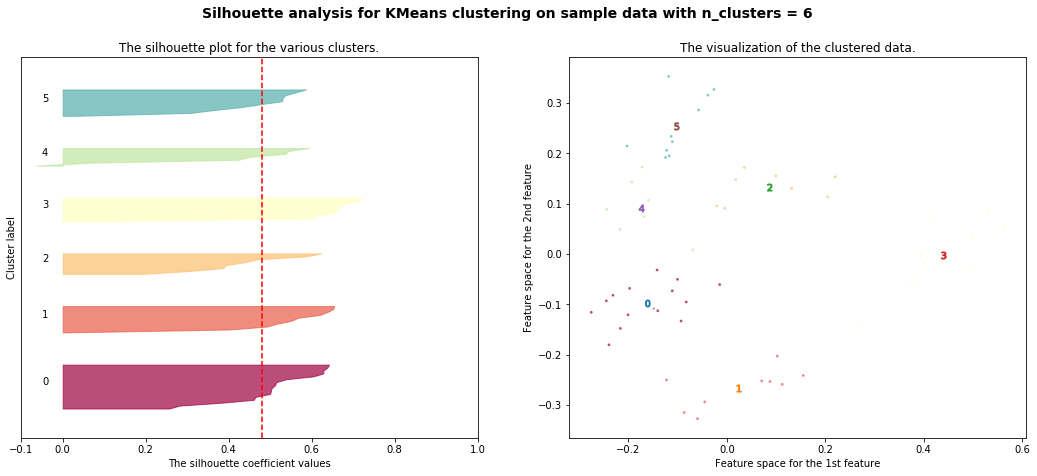

For n_clusters = 7 The average silhouette_score is : 0.49934294025302367


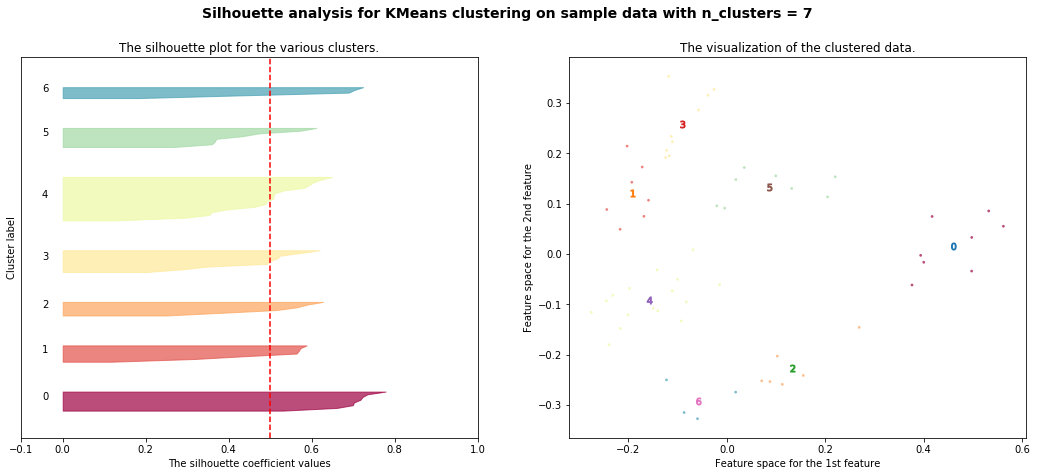

For n_clusters = 8 The average silhouette_score is : 0.4830903333698996


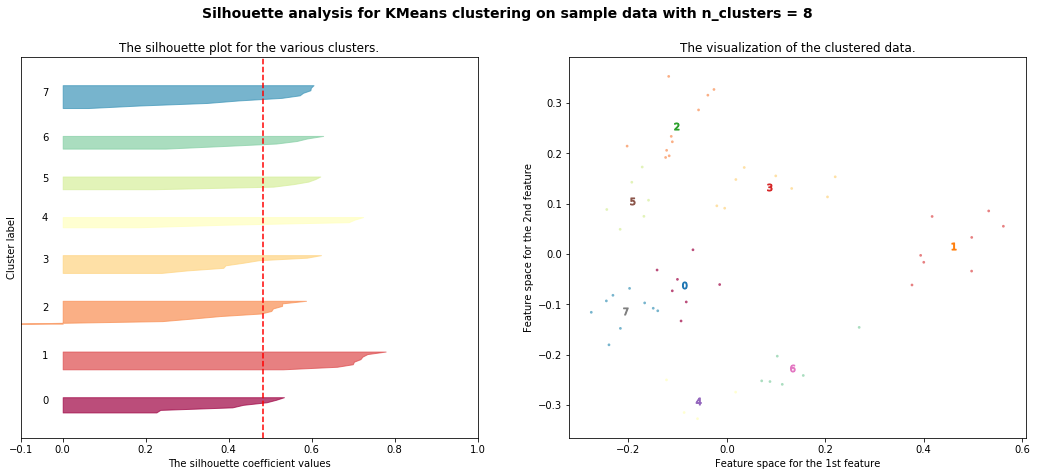

For n_clusters = 9 The average silhouette_score is : 0.4876518932197824


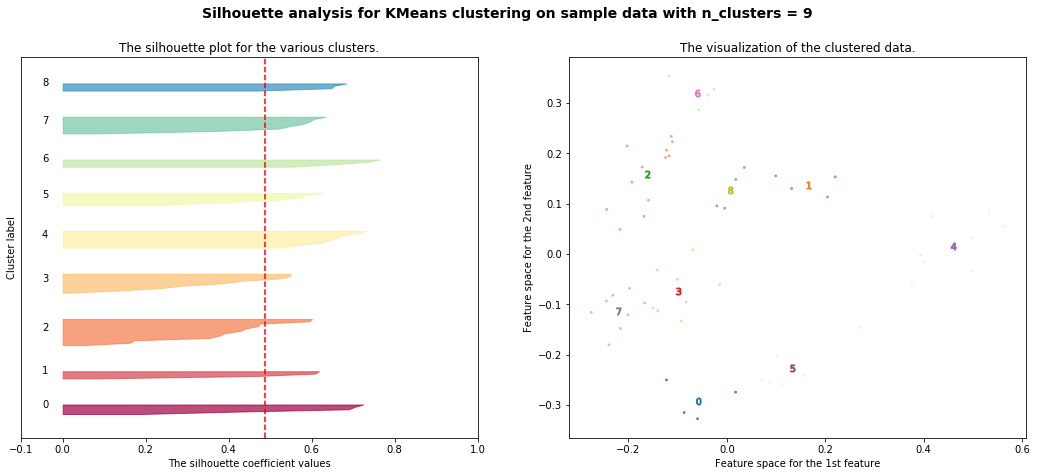

For n_clusters = 10 The average silhouette_score is : 0.5012231024781302


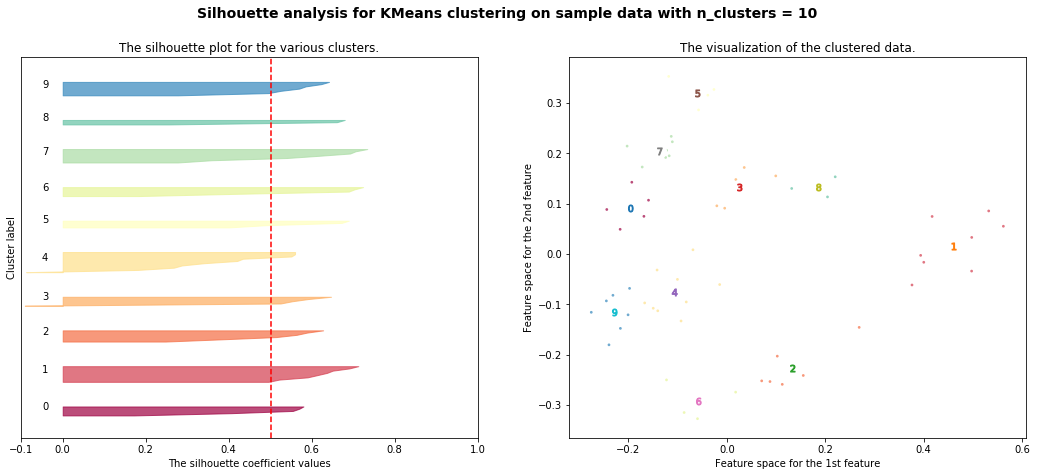

For n_clusters = 11 The average silhouette_score is : 0.4887103003330416


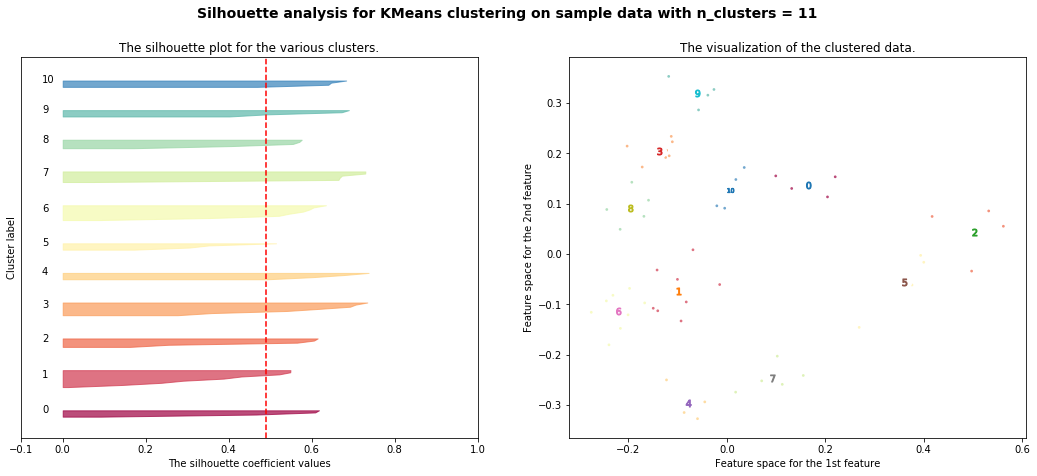

For n_clusters = 12 The average silhouette_score is : 0.4785129769694551


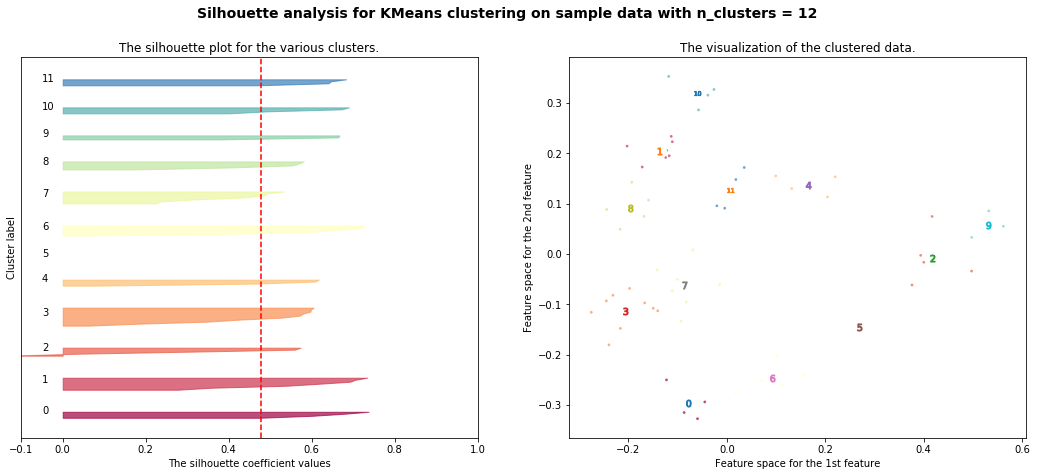

In [0]:
## from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = X_pca.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [0]:
from sklearn.cluster import AgglomerativeClustering 

In [0]:
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='ward')

In [0]:
model2.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

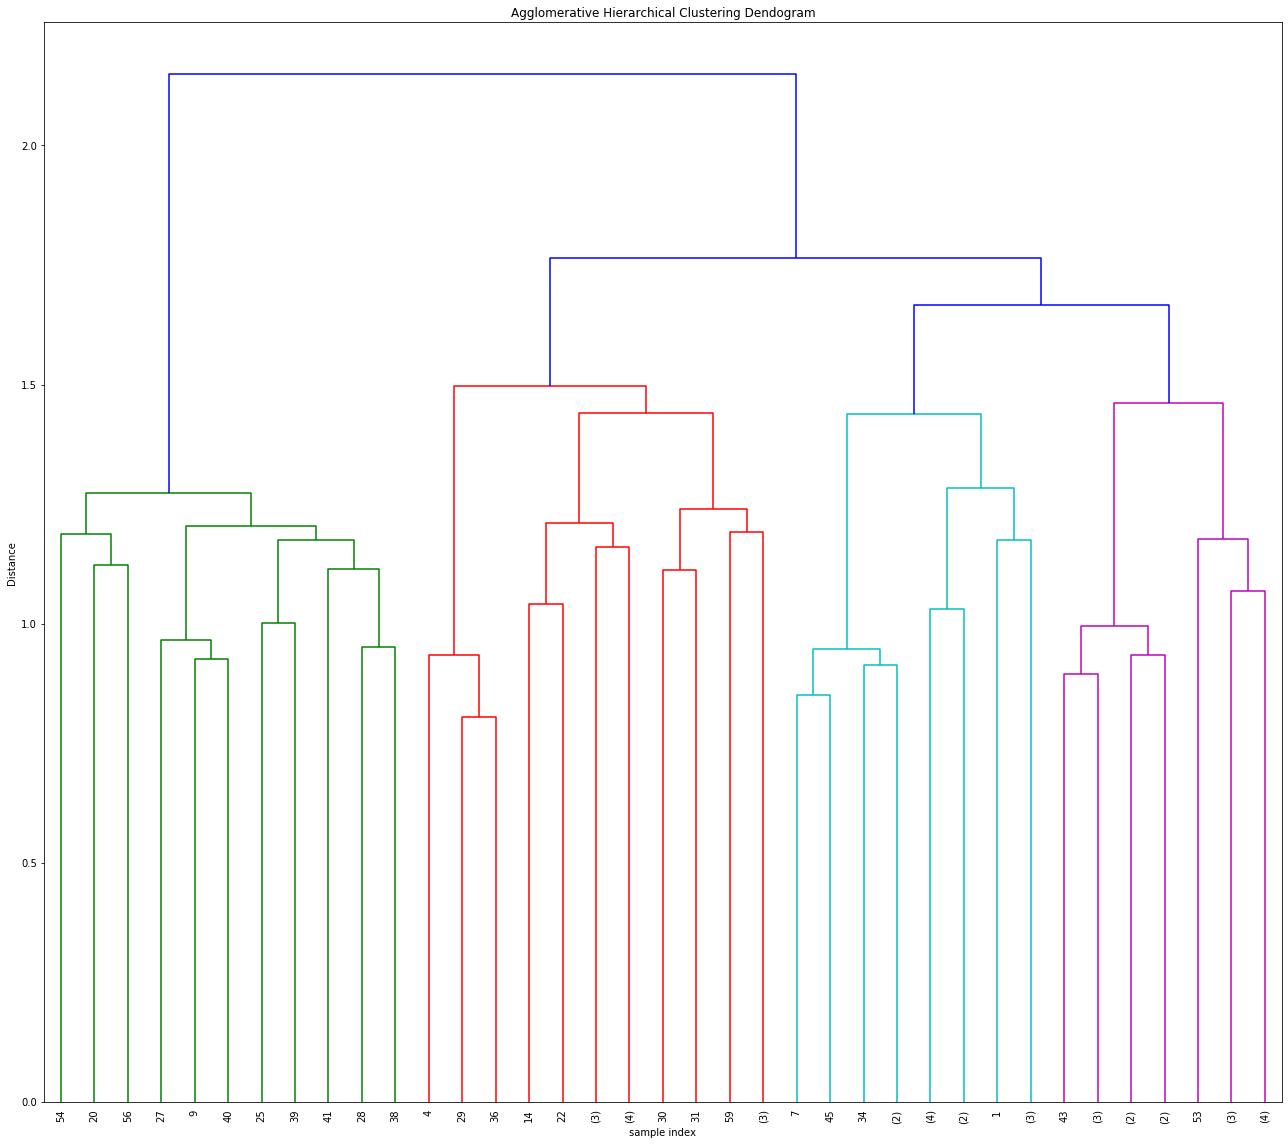

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=1.5,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [0]:
kmeans = KMeans(n_clusters=13,n_init = 15,random_state=1)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
df = pd.DataFrame({'labels': labels, 'company': companies})
# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                             company
20       0                          Home Depot
31       0                           McDonalds
54       0                            Walgreen
16       1                   General Electrics
43       1                                 SAP
7        1                               Canon
34       1                          Mitsubishi
13       1                   DuPont de Nemours
21       1                               Honda
35       2                            Navistar
58       2                               Xerox
15       2                                Ford
22       2                                  HP
1        2                                 AIG
41       3                       Philip Morris
56       3                            Wal-Mart
28       3                           Coca Cola
10       4                      ConocoPhillips
42       4                   Royal Dutch Shell
49       4                               Total
57       4   

In [0]:
fin_data=pd.merge(data,df)

In [0]:
fin_data

,company,04-01-2010,05-01-2010,06-01-2010,07-01-2010,08-01-2010,11-01-2010,12-01-2010,13-01-2010,14-01-2010,15-01-2010,19-01-2010,20-01-2010,21-01-2010,22-01-2010,25-01-2010,26-01-2010,27-01-2010,28-01-2010,29-01-2010,01-02-2010,02-02-2010,03-02-2010,04-02-2010,05-02-2010,08-02-2010,09-02-2010,10-02-2010,11-02-2010,12-02-2010,16-02-2010,17-02-2010,18-02-2010,19-02-2010,22-02-2010,23-02-2010,24-02-2010,25-02-2010,26-02-2010,01-03-2010,...,05-09-2013,06-09-2013,09-09-2013,10-09-2013,11-09-2013,12-09-2013,13-09-2013,16-09-2013,17-09-2013,18-09-2013,19-09-2013,20-09-2013,23-09-2013,24-09-2013,25-09-2013,26-09-2013,27-09-2013,30-09-2013,01-10-2013,02-10-2013,03-10-2013,04-10-2013,07-10-2013,08-10-2013,09-10-2013,10-10-2013,11-10-2013,14-10-2013,15-10-2013,16-10-2013,17-10-2013,18-10-2013,21-10-2013,22-10-2013,23-10-2013,24-10-2013,25-10-2013,28-10-2013,29-10-2013,labels
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,6.709993,-3.180006,-4.009998,-9.030006,0.560000,-0.010000,1.030010,-5.640009,-9.019993,2.360001,-0.050001,4.060000,-4.680000,2.829998,-1.570009,-0.229992,-0.769990,3.789993,2.269998,1.459994,-1.639998,1.300003,-0.190005,-1.920004,-2.940000,2.430002,4.619999,2.239998,3.240008,...,-4.980034,-0.219979,1.169960,-11.559998,0.699989,4.190003,-4.439995,-10.879982,7.360008,1.500008,1.599983,-10.589988,-5.459991,-5.779999,-7.669976,0.219979,-1.029983,-0.500038,9.510018,3.929970,-7.100029,-0.829979,1.190040,-9.000045,1.950005,-1.679985,5.820000,6.209969,1.169960,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981,5
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,0.200001,-0.100000,-0.460001,-1.190001,-0.650000,-1.300001,0.430000,-1.690000,-0.300001,-0.420000,-0.020001,-0.099998,-0.940001,-0.090000,-0.250000,0.760000,3.710001,-0.200001,1.000000,0.000000,-0.630001,0.299999,-0.010000,1.540001,-1.459999,0.830000,0.069999,-0.900000,-2.179998,...,0.229999,-0.720002,0.829998,-0.130001,0.340000,-0.620003,0.320000,-0.470001,0.790001,0.279999,-0.930000,-0.020000,-0.439998,0.100003,0.190003,-0.239998,-0.029998,0.020000,0.579998,0.350002,-0.210003,0.660000,-0.310001,-1.099998,0.050000,1.290001,0.330002,0.599999,-0.160000,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000,2
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,1.300003,-1.349998,-0.639999,-4.169998,-1.790000,-1.079995,1.720001,1.599999,-4.360000,-4.309997,-0.669998,1.979995,-2.699997,1.510002,-2.549995,-0.169998,-0.639999,2.879997,0.670006,-2.529999,-0.760002,2.240006,-0.390007,0.639999,-0.770004,1.760002,0.029999,0.520005,5.840004,...,0.470001,0.529998,2.489990,-0.190003,0.730011,-0.530030,-2.220002,-3.760009,6.540008,7.970001,-1.709991,3.799987,-2.520020,1.700012,-1.880005,4.220001,-0.910003,-0.769989,6.730011,2.470001,-5.630005,3.910004,-5.209991,-8.269989,-5.190002,0.540008,6.120026,1.480011,-3.470001,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021,5
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,0.719997,0.050000,-0.830002,-2.770001,-1.309997,0.559997,0.709999,-1.239998,0.060002,0.369999,0.340000,-0.579998,-0.500000,0.189998,-0.969997,0.270001,0.169998,0.480000,0.629997,0.809998,-0.480000,0.080002,0.170002,-0.169998,-0.810002,0.310002,0.370003,0.039997,-0.070000,...,0.639999,-0.570000,0.070008,0.379997,0.480003,0.000000,-0.279999,-0.739998,1.320000,0.650001,-0.239998,-0.300003,-0.849999,-0.319999,-0.139999,0.320000,-0.169999,0.549996,0.290001,-0.549995,-0.090004,0.430001,-0.559998,-0.809998,-0.159996,1.470002,0.730004,0.739998,-0.379997,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001,7
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002